In [1]:
import os
import torch
import torchvision
import torch.nn as nn
import torch.optim as optim
from torchvision import datasets, transforms, models
from torch.utils.data import DataLoader
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt

In [2]:
data_transforms = {
    'train': transforms.Compose([
        transforms.Resize((224, 224)),
        transforms.RandomHorizontalFlip(),
        transforms.RandomRotation(10),
        transforms.ToTensor(),
        transforms.Normalize([0.485, 0.456, 0.406],
                             [0.229, 0.224, 0.225])
    ]),
    'val': transforms.Compose([
        transforms.Resize((224, 224)),
        transforms.ToTensor(),
        transforms.Normalize([0.485, 0.456, 0.406],
                             [0.229, 0.224, 0.225])
    ])
}

In [3]:
# from sklearn.model_selection import train_test_split
# import shutil
# import os

# def prepare_data_split(original_dir, train_dir, val_dir, split_ratio=0.8):
#     for class_name in os.listdir(original_dir):
#         class_path = os.path.join(original_dir, class_name)
#         images = os.listdir(class_path)
#         train_imgs, val_imgs = train_test_split(images, train_size=split_ratio, random_state=42)

#         os.makedirs(os.path.join(train_dir, class_name), exist_ok=True)
#         os.makedirs(os.path.join(val_dir, class_name), exist_ok=True)

#         for img in train_imgs:
#             shutil.copy(os.path.join(class_path, img), os.path.join(train_dir, class_name, img))

#         for img in val_imgs:
#             shutil.copy(os.path.join(class_path, img), os.path.join(val_dir, class_name, img))

# prepare_data_split("/content/drive/MyDrive/Quidich Task/cleaned_dataset", "/content/drive/MyDrive/Quidich Task/train", "/content/drive/MyDrive/Quidich Task/val")


In [4]:
batch_size = 32

train_dataset = datasets.ImageFolder("/content/drive/MyDrive/Quidich Task/train", transform=data_transforms['train'])
val_dataset = datasets.ImageFolder("/content/drive/MyDrive/Quidich Task/val", transform=data_transforms['val'])

train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=batch_size)

In [5]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

model = models.resnet18(pretrained=True)
num_features = model.fc.in_features
model.fc = nn.Linear(num_features, 2)
model = model.to(device)

/usr/local/lib/python3.11/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet18_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet18_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/resnet18-f37072fd.pth" to /root/.cache/torch/hub/checkpoints/resnet18-f37072fd.pth
100%|██████████| 44.7M/44.7M [00:00<00:00, 84.1MB/s]


In [6]:
criterion = nn.CrossEntropyLoss()
optimizer = optim.AdamW(model.parameters(), lr=0.0001)

In [7]:
from sklearn.metrics import accuracy_score

num_epochs = 10

for epoch in range(num_epochs):
    model.train()
    running_train_loss = 0.0
    train_preds, train_labels = [], []

    for inputs, labels in train_loader:
        inputs, labels = inputs.to(device), labels.to(device)

        optimizer.zero_grad()
        outputs = model(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        running_train_loss += loss.item()
        _, preds = torch.max(outputs, 1)
        train_preds.extend(preds.cpu().numpy())
        train_labels.extend(labels.cpu().numpy())

    train_loss = running_train_loss / len(train_loader)
    train_acc = accuracy_score(train_labels, train_preds)

    # val loop
    model.eval()
    running_val_loss = 0.0
    val_preds, val_labels = [], []

    with torch.no_grad():
        for inputs, labels in val_loader:
            inputs, labels = inputs.to(device), labels.to(device)

            outputs = model(inputs)
            loss = criterion(outputs, labels)
            running_val_loss += loss.item()

            _, preds = torch.max(outputs, 1)
            val_preds.extend(preds.cpu().numpy())
            val_labels.extend(labels.cpu().numpy())

    val_loss = running_val_loss / len(val_loader)
    val_acc = accuracy_score(val_labels, val_preds)

    print(f"Epoch {epoch+1}/{num_epochs}")
    print(f"Train Loss: {train_loss:.4f} | Train Acc: {train_acc:.4f}")
    print(f"Val   Loss: {val_loss:.4f} | Val   Acc: {val_acc:.4f}")
    print("\n")


Epoch 1/10
Train Loss: 0.2646 | Train Acc: 0.8899
Val   Loss: 0.1970 | Val   Acc: 0.9191


Epoch 2/10
Train Loss: 0.1808 | Train Acc: 0.9266
Val   Loss: 0.1742 | Val   Acc: 0.9312


Epoch 3/10
Train Loss: 0.1363 | Train Acc: 0.9447
Val   Loss: 0.1901 | Val   Acc: 0.9330


Epoch 4/10
Train Loss: 0.1157 | Train Acc: 0.9555
Val   Loss: 0.1899 | Val   Acc: 0.9264


Epoch 5/10
Train Loss: 0.0869 | Train Acc: 0.9666
Val   Loss: 0.1818 | Val   Acc: 0.9366


Epoch 6/10
Train Loss: 0.0760 | Train Acc: 0.9734
Val   Loss: 0.1873 | Val   Acc: 0.9396


Epoch 7/10
Train Loss: 0.0646 | Train Acc: 0.9757
Val   Loss: 0.1788 | Val   Acc: 0.9396


Epoch 8/10
Train Loss: 0.0583 | Train Acc: 0.9784
Val   Loss: 0.1900 | Val   Acc: 0.9451


Epoch 9/10
Train Loss: 0.0433 | Train Acc: 0.9835
Val   Loss: 0.1985 | Val   Acc: 0.9427


Epoch 10/10
Train Loss: 0.0420 | Train Acc: 0.9828
Val   Loss: 0.2311 | Val   Acc: 0.9445




In [8]:
torch.save(model.state_dict(), "resnet18_binary_classification.pth")

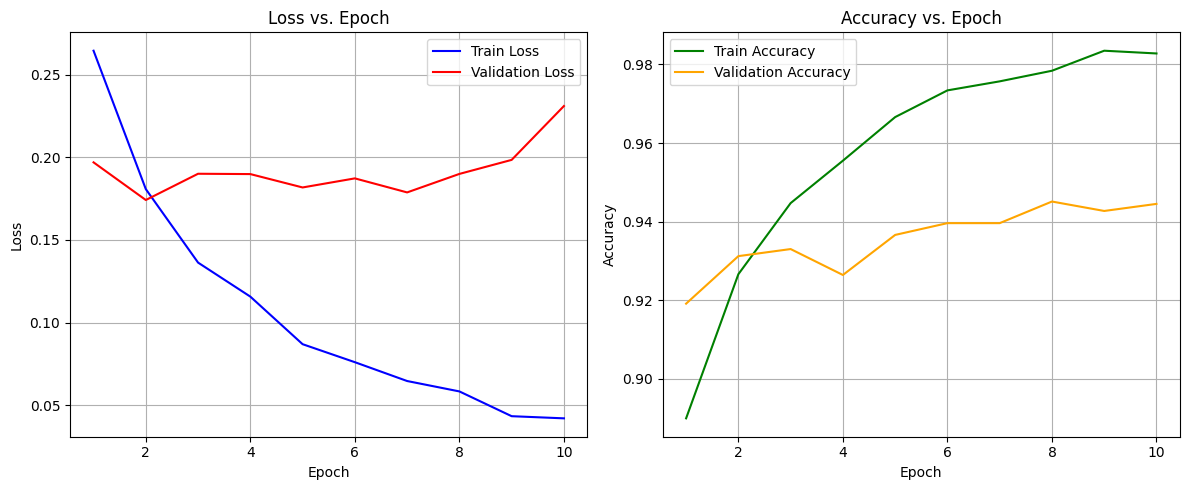

In [8]:
import matplotlib.pyplot as plt

# Manually entered metrics from your logs
train_losses = [0.2646, 0.1808, 0.1363, 0.1157, 0.0869, 0.0760, 0.0646, 0.0583, 0.0433, 0.0420]
val_losses   = [0.1970, 0.1742, 0.1901, 0.1899, 0.1818, 0.1873, 0.1788, 0.1900, 0.1985, 0.2311]

train_accs   = [0.8899, 0.9266, 0.9447, 0.9555, 0.9666, 0.9734, 0.9757, 0.9784, 0.9835, 0.9828]
val_accs     = [0.9191, 0.9312, 0.9330, 0.9264, 0.9366, 0.9396, 0.9396, 0.9451, 0.9427, 0.9445]

epochs = range(1, 11)

# Create subplots
plt.figure(figsize=(12, 5))

# 🔵 Loss plot
plt.subplot(1, 2, 1)
plt.plot(epochs, train_losses, 'b-', label='Train Loss')
plt.plot(epochs, val_losses, 'r-', label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Loss vs. Epoch')
plt.legend()
plt.grid(True)

# 🟢 Accuracy plot
plt.subplot(1, 2, 2)
plt.plot(epochs, train_accs, 'g-', label='Train Accuracy')
plt.plot(epochs, val_accs, 'orange', label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Accuracy vs. Epoch')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()